# Air Quality of Indian Cities
## About The Project

Through this project I am trying to analyse, using the data of air quality in major Indian cities, the condition of air polution in our country. We will know in the end if the condition has improved or worsened and check the progress of major cities with regards to air pollution.

## Dataset

The dataset used here has been downloaded from Kaggle. The link to which is as follows.
https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?resource=download.
It consists of air quality data of major cities from 2015 to 2020.

In [1]:
dataset_url = 'https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?resource=download'

Installing opendatasets package

In [2]:
!pip install opendatasets
!pip install pandas

Importing the dataset

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\air-quality-data-in-india" (use force=True to force download)


In [4]:
import os 
os.listdir('.')

['.ipynb_checkpoints',
 'air-quality-data-in-india',
 'Air_Quality_Index-Copy1.ipynb',
 'Air_Quality_Index.ipynb']

In [5]:
data_dir = "./air-quality-data-in-india"

In [6]:
os.listdir(data_dir)

['city_day.csv',
 'city_hour.csv',
 'stations.csv',
 'station_day.csv',
 'station_hour.csv']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
air_quality_df = pd.read_csv('./air-quality-data-in-india/city_day.csv')
air_quality_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### Cleaning the dataset
In this step the problems like missing dataset, invalid data will be handled.

#### Deleting the rows which have no data except city name
#### and also deleting the AQI_Bucket column


In [32]:
aq_df = air_quality_df.dropna(thresh = 14).reset_index(drop =True)

In [33]:
aq_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
18720,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
18721,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
18722,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [36]:
aq_df = aq_df.drop(["AQI_Bucket"],axis = 1)


In [37]:
aq_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
18720,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
18721,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
18722,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


#### Replacing NaN values with zeroes
We have to handle the NaN values. So wherever in the dataframe, we find NaN values. It's to be replaced with 0 except for the AQI column. It will be replaced with mean.


In [41]:
## Replacing NaN values in AQI with Mean of the AQI.
aq_df["AQI"] = aq_df["AQI"].fillna(aq_df.mean(numeric_only = True))

In [42]:
## replacing all other NaN values with 0.
aq_df.fillna(0)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-29,83.13,0.00,6.93,28.71,33.72,0.00,6.93,49.52,59.76,0.02,0.00,3.14,209.0
1,Ahmedabad,2015-01-30,79.84,0.00,13.85,28.68,41.08,0.00,13.85,48.49,97.07,0.04,0.00,4.81,328.0
2,Ahmedabad,2015-01-31,94.52,0.00,24.39,32.66,52.61,0.00,24.39,67.39,111.33,0.24,0.01,7.67,514.0
3,Ahmedabad,2015-02-01,135.99,0.00,43.48,42.08,84.57,0.00,43.48,75.23,102.70,0.40,0.04,25.87,782.0
4,Ahmedabad,2015-02-02,178.33,0.00,54.56,35.31,72.80,0.00,54.56,55.04,107.38,0.46,0.06,35.61,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
18720,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
18721,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
18722,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


### Finding list of different cities

In [44]:
cities = pd.unique(aq_df['City'])
print(cities)
print("There are total of {} cities in the dataframe".format(len(cities)))

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Brajrajnagar'
 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam' 'Gurugram'
 'Guwahati' 'Hyderabad' 'Jaipur' 'Kochi' 'Kolkata' 'Lucknow' 'Mumbai'
 'Patna' 'Shillong' 'Talcher' 'Visakhapatnam']
There are total of 23 cities in the dataframe


### Sorting the cities in order of  average AQIs (Ascending)

In [45]:
avg_aqi = aq_df.groupby("City")['AQI'].mean()
avg_aqi.sort_values()


City
Aizawl            37.000000
Shillong          53.815000
Coimbatore        73.846626
Ernakulam         92.598684
Bengaluru         94.902394
Chandigarh        95.176271
Amaravati         95.570379
Mumbai            99.678481
Kochi            105.186567
Chennai          107.651332
Hyderabad        107.996016
Visakhapatnam    117.422680
Amritsar         122.763048
Jaipur           134.483660
Kolkata          140.566313
Guwahati         141.000000
Brajrajnagar     150.494915
Talcher          161.102908
Gurugram         203.560531
Lucknow          217.587824
Patna            239.271324
Delhi            266.973904
Ahmedabad        452.074013
Name: AQI, dtype: float64

We can see that Aizawl has the minimum avearge AQI and Ahmedabad has the maximum Average AQI among all the cities in the dataframe. 

### Plotting curve for AQI of  Ahmedabad City

First we convert the date into datetime type from object type

In [46]:
aq_df['Date'] = pd.to_datetime(aq_df['Date'])
aq_df.dtypes

City               object
Date       datetime64[ns]
PM2.5             float64
PM10              float64
NO                float64
NO2               float64
NOx               float64
NH3               float64
CO                float64
SO2               float64
O3                float64
Benzene           float64
Toluene           float64
Xylene            float64
AQI               float64
dtype: object

Creating a smaller database for Ahmedabad city

In [49]:
ahmd_df = aq_df[aq_df['City']=='Ahmedabad']
ahmd_df.reset_index(drop=True)
ahmd_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0
2,Ahmedabad,2015-01-31,94.52,0.00,24.39,32.66,52.61,0.0,24.39,67.39,111.33,0.24,0.01,7.67,514.0
3,Ahmedabad,2015-02-01,135.99,0.00,43.48,42.08,84.57,0.0,43.48,75.23,102.70,0.40,0.04,25.87,782.0
4,Ahmedabad,2015-02-02,178.33,0.00,54.56,35.31,72.80,0.0,54.56,55.04,107.38,0.46,0.06,35.61,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Ahmedabad,2020-06-27,62.12,118.67,9.18,56.35,19.86,NaN,0.49,12.44,68.05,1.32,37.76,1.62,92.0
1212,Ahmedabad,2020-06-28,31.57,NaN,6.37,23.99,16.40,NaN,0.52,11.01,26.34,1.37,49.58,1.34,82.0
1213,Ahmedabad,2020-06-29,29.75,127.98,9.06,25.15,18.92,NaN,0.67,12.10,34.99,1.39,60.21,0.79,74.0
1214,Ahmedabad,2020-06-30,40.02,121.10,7.09,58.92,33.41,NaN,0.73,16.39,41.64,1.21,44.10,1.35,98.0


In [53]:
ahmd_df['Month']=ahmd_df['Date'].dt.month

Added a Month Column in the dataframe. I will now group this dataframe according to months and plot a graph AQI vs Months for knowing about trends of avg AQI for a month for every year. 

In [75]:
ahmd_df = ahmd_df.groupby('Month').mean()

In [55]:
ahmd_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Month,,,,,,,,,,,,,
1,79.180778,107.696071,29.269111,81.592444,54.659000,0.0,29.269111,73.453778,45.010222,8.132444,44.088556,7.395000,586.088889
2,86.435421,105.058250,32.014486,79.469346,61.398411,0.0,32.014486,71.852991,46.141509,4.738692,31.912523,5.876449,624.084112
3,80.495259,106.647500,21.880259,64.217241,47.310172,NaN,21.880259,60.218793,46.289381,7.810690,38.008879,5.944397,534.543103
4,75.298468,81.426000,15.267297,44.461982,35.496937,NaN,14.670360,39.954595,40.871982,4.940811,24.995586,4.932973,400.639640
5,52.510182,97.807292,9.958364,35.338364,28.198182,NaN,9.157182,64.730595,40.669364,6.642545,30.903091,4.738455,273.127273
6,44.509537,112.578364,14.361019,55.524167,42.888056,NaN,12.862593,32.385140,33.885741,6.683056,46.332500,4.547757,265.583333
7,50.740842,117.014138,21.029053,55.470000,50.128632,NaN,20.985474,33.914842,18.563474,4.340947,37.873895,1.167579,356.263158
8,43.432679,137.710345,21.718304,32.150714,41.374464,NaN,21.718304,35.411071,23.816250,3.164375,16.263661,0.983571,373.776786
9,39.944405,82.395833,16.104048,41.044048,40.287500,NaN,16.104048,32.565595,30.330357,1.407262,12.164286,0.832738,340.059524


## Reference data for AQI levels
good = 0 - 50 <br>
satisfactory = 50 - 100 <br>
moderately_polluted = 100 - 200 <br>
poor = 200 - 300 <br>
very_poor = 300 - 400 <br> 
severe = 400 - 500 and above

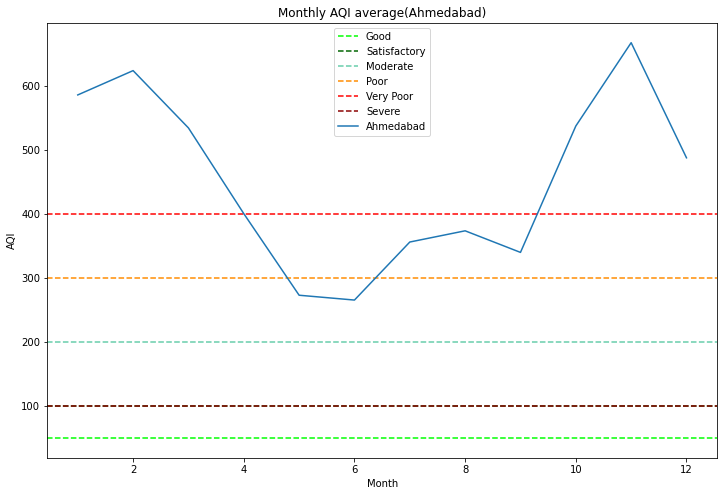

In [134]:
plt.figure(figsize =(12,8))
plt.axhline(y = 50, color = 'lime', linestyle = '--')
plt.axhline(y = 100, color = 'darkgreen', linestyle = '--')
plt.axhline(y = 200, color = 'mediumaquamarine', linestyle = '--')
plt.axhline(y = 300, color = 'darkorange', linestyle = '--')
plt.axhline(y = 400, color = 'red', linestyle = '--')
plt.axhline(y = 100, color = 'darkred', linestyle = '--')
plt.plot(ahmd_df.index, ahmd_df.AQI)
plt.title('Monthly AQI average(Ahmedabad)')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.legend(['Good','Satisfactory','Moderate','Poor','Very Poor','Severe','Ahmedabad']);

### Comparing these values with Delhi, the capital city always in news for pollution


I followed similar process for Delhi. It is as follows

In [73]:
##Creating a smaller dataframe for Delhi
dl_df = aq_df[aq_df['City']=='Delhi'].reset_index(drop=True)

In [78]:
##Adding 'Month' Column in the dataframe
dl_df['Month'] = dl_df['Date'].dt.month

In [81]:
##grouping by Month 
dl_df = dl_df.groupby('Month').mean()

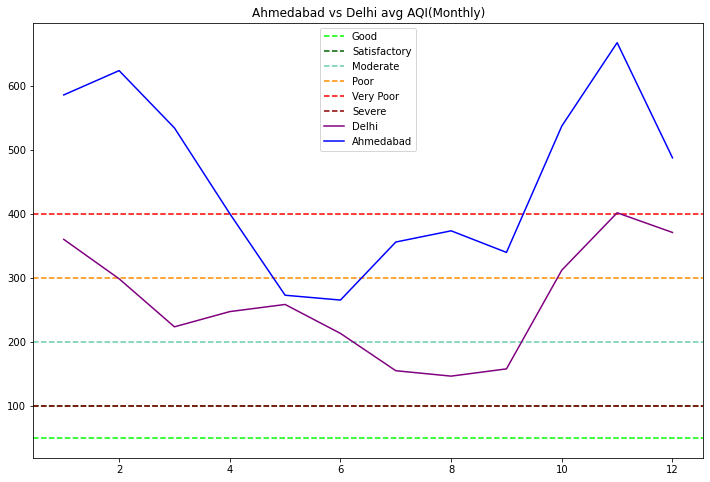

In [139]:
plt.figure(figsize =(12,8))
plt.axhline(y = 50, color = 'lime', linestyle = '--')
plt.axhline(y = 100, color = 'darkgreen', linestyle = '--')
plt.axhline(y = 200, color = 'mediumaquamarine', linestyle = '--')
plt.axhline(y = 300, color = 'darkorange', linestyle = '--')
plt.axhline(y = 400, color = 'red', linestyle = '--')
plt.axhline(y = 100, color = 'darkred', linestyle = '--')
plt.plot(dl_df.index, dl_df.AQI, 'purple')
plt.plot(ahmd_df.index, ahmd_df.AQI, 'b')
plt.legend(['Good','Satisfactory','Moderate','Poor','Very Poor','Severe','Delhi','Ahmedabad'])
plt.title("Ahmedabad vs Delhi avg AQI(Monthly)");

### Checking average AQI of Delhi and Ahmedabad (Yearly average)

In [102]:
##Creating smaller dataframes for Delhi and Ahmedabad
dl2_df = aq_df[aq_df['City']=='Delhi'].reset_index(drop=True)
ahmd2_df = aq_df[aq_df['City']=='Ahmedabad'].reset_index(drop=True)

In [103]:
##Adding 'Year' Column in the dataframes
dl2_df['Year'] = dl2_df['Date'].dt.year

ahmd2_df['Year'] = ahmd2_df['Date'].dt.year

In [104]:
##grouping by Year
dl2_df = dl2_df.groupby('Year').mean()

ahmd2_df = ahmd2_df.groupby('Year').mean()

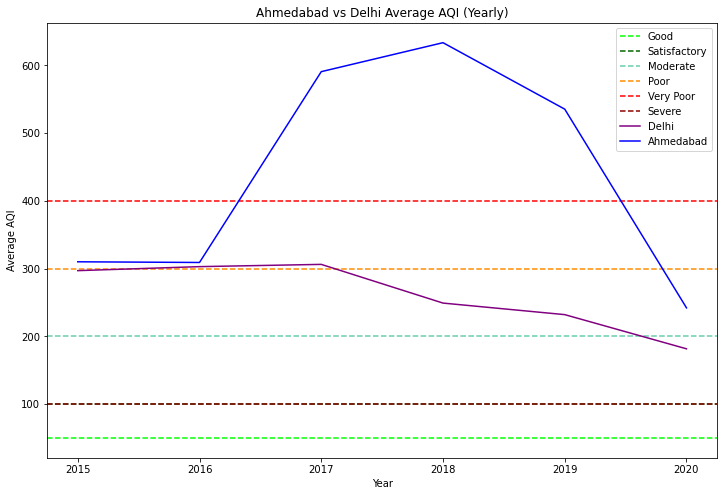

In [141]:
plt.figure(figsize =(12,8))
plt.axhline(y = 50, color = 'lime', linestyle = '--')
plt.axhline(y = 100, color = 'darkgreen', linestyle = '--')
plt.axhline(y = 200, color = 'mediumaquamarine', linestyle = '--')
plt.axhline(y = 300, color = 'darkorange', linestyle = '--')
plt.axhline(y = 400, color = 'red', linestyle = '--')
plt.axhline(y = 100, color = 'darkred', linestyle = '--')
plt.plot(dl2_df.index, dl2_df.AQI, 'purple')
plt.plot(ahmd2_df.index, ahmd2_df.AQI, 'blue')
plt.title('Ahmedabad vs Delhi Average AQI (Yearly)')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.legend(['Good','Satisfactory','Moderate','Poor','Very Poor','Severe','Delhi','Ahmedabad']);

So we can conclude that Yearly average AQI as well as monthly average AQI of __Delhi__ is always less than that of __Ahmedabad__ in the period of 2015-2020. Both of the cities had almost equal averages in the year 2015 and 2016. But after that AQI of Delhi decreased but Ahmedabad was recorded to have an increase in its average yearly AQI. Then Ahmedabad also saw a decrease in AQI after 2018.

# NEXT, try to fit all 23 cities data in the curve 
# USE curves other than line chart
# USE heat map for showing values of all pollutants


### Heat map for Bengaluru for each month

In [170]:
#Creating smaller dataframe for Aizawl
bng_df = aq_df[aq_df['City']=='Bengaluru'].reset_index(drop=True)

In [173]:
# Creating a month column in the table
bng_df['Month'] = bng_df['Date'].dt.month
# Grouping by month
bng_df = bng_df.groupby('Month').mean()

In [174]:
bng_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Month,,,,,,,,,,,,,
1,48.103214,102.573723,13.574000,41.592857,32.529786,24.392370,1.273500,7.243429,43.890643,1.264143,3.822714,NaN,113.607143
2,45.393459,102.698397,8.744135,36.438045,25.020526,23.986696,1.681654,5.638195,43.813684,1.111053,1.733609,NaN,111.112782
3,43.715438,107.140403,7.609563,30.063875,20.734813,22.057836,1.179312,5.111688,46.556375,1.517937,5.638375,NaN,107.412500
4,36.889437,95.832846,6.288099,23.238944,15.218028,20.497111,1.234085,4.982535,51.576408,2.514930,3.650634,NaN,103.161972
5,32.977063,67.172692,6.886000,24.120812,15.277250,15.163264,1.627500,4.936687,35.799119,3.175938,2.690625,NaN,85.318750
6,22.692102,56.139154,6.521083,19.779745,13.612038,18.960764,1.307962,5.599936,21.575414,1.049873,1.797006,NaN,75.305732
7,24.221949,66.947895,10.339661,21.070763,14.098983,20.344407,2.564322,5.485847,22.416949,3.193475,2.440085,NaN,93.474576
8,20.154706,60.547857,11.226639,20.289244,15.608067,21.100085,4.562185,4.854454,16.812017,2.762500,13.692353,NaN,80.563025
9,26.094732,68.924464,11.199821,26.995446,17.782679,23.947009,0.738304,5.670089,22.557411,0.783545,1.898125,NaN,74.169643


In [175]:
plt.figure(figsize = (12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>